In [1]:
import pandas as pd 
import numpy as np 
import pyodbc
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import json

import warnings
warnings.filterwarnings("ignore")

In [39]:
df = pd.read_csv("transactions_data.csv")
df.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


In [3]:
df.tail()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
13305910,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,NaN
13305911,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,NaN,NaN,5815,NaN
13305912,23761870,2019-10-31 23:57:00,199,1031,$40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900,NaN
13305913,23761873,2019-10-31 23:58:00,1986,5443,$4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411,NaN
13305914,23761874,2019-10-31 23:59:00,489,5697,$12.88,Chip Transaction,24658,Greenbrier,TN,37073.0,5921,NaN


In [4]:
df.columns

Index(['id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors'],
      dtype='object')

In [5]:
df.shape

(13305915, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          object 
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 10  mcc             int64  
 11  errors          object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.2+ GB


In [7]:
df.describe()

,id,client_id,card_id,merchant_id,zip,mcc
count,1.330592e+07,1.330592e+07,1.330592e+07,1.330592e+07,1.165321e+07,1.330592e+07
mean,1.558402e+07,1.026812e+03,3.475268e+03,4.772376e+04,5.132782e+04,5.565440e+03
std,4.704499e+06,5.816386e+02,1.674356e+03,2.581534e+04,2.940423e+04,8.757002e+02
min,7.475327e+06,0.000000e+00,0.000000e+00,1.000000e+00,1.001000e+03,1.711000e+03
25%,1.150604e+07,5.190000e+02,2.413000e+03,2.588700e+04,2.860200e+04,5.300000e+03
50%,1.557087e+07,1.070000e+03,3.584000e+03,4.592600e+04,4.767000e+04,5.499000e+03
75%,1.965361e+07,1.531000e+03,4.901000e+03,6.757000e+04,7.790100e+04,5.812000e+03
max,2.376187e+07,1.998000e+03,6.144000e+03,1.003420e+05,9.992800e+04,9.402000e+03


In [8]:
df.describe(include="O")

,date,amount,use_chip,merchant_city,merchant_state,errors
count,13305915,13305915,13305915,13305915,11742215,211393
unique,4136496,81161,3,12492,199,22
top,2011-06-09 12:46:00,$80.00,Swipe Transaction,ONLINE,CA,Insufficient Balance
freq,18,132115,6967185,1563700,1427087,130902


In [9]:
df.duplicated().sum()

np.int64(0)

In [40]:
df.isna().sum()

id                       0
date                     0
client_id                0
card_id                  0
amount                   0
use_chip                 0
merchant_id              0
merchant_city            0
merchant_state     1563700
zip                1652706
mcc                      0
errors            13094522
dtype: int64

In [11]:
df["amount"].unique()

array(['$-77.00', '$14.57', '$80.00', ..., '$397.54', '$693.96',
       '$694.30'], shape=(81161,), dtype=object)

In [41]:
df['amount']=df['amount'].astype(str).str.replace('₹','').str.replace('%','').str.replace(',','').str.replace('(','').str.replace(')','').str.replace('nan','0')
df['amount'] = pd.to_numeric(df['amount'].str.replace('[^0-9.]','',regex=True),errors='coerce').fillna(0)

In [13]:
df.dtypes

id                  int64
date               object
client_id           int64
card_id             int64
amount            float64
use_chip           object
merchant_id         int64
merchant_city      object
merchant_state     object
zip               float64
mcc                 int64
errors             object
dtype: object

In [42]:
df["errors"].fillna("no errors",inplace=True)

In [15]:
df[df["merchant_state"].isnull()]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
7,7475335,2010-01-01 00:14:00,1684,2140,26.46,Online Transaction,39021,ONLINE,NaN,NaN,4784,no errors
8,7475336,2010-01-01 00:21:00,335,5131,261.58,Online Transaction,50292,ONLINE,NaN,NaN,7801,no errors
18,7475346,2010-01-01 00:34:00,394,4717,26.04,Online Transaction,39021,ONLINE,NaN,NaN,4784,no errors
24,7475353,2010-01-01 00:43:00,301,3742,10.17,Online Transaction,39021,ONLINE,NaN,NaN,4784,no errors
26,7475356,2010-01-01 00:45:00,566,3439,16.86,Online Transaction,16798,ONLINE,NaN,NaN,4121,no errors
...,...,...,...,...,...,...,...,...,...,...,...,...
13305879,23761832,2019-10-31 23:22:00,1556,2972,17.65,Online Transaction,88459,ONLINE,NaN,NaN,5311,no errors
13305880,23761833,2019-10-31 23:22:00,1797,5660,34.81,Online Transaction,15143,ONLINE,NaN,NaN,4784,no errors
13305888,23761843,2019-10-31 23:33:00,1069,5167,59.71,Online Transaction,39021,ONLINE,NaN,NaN,4784,no errors
13305897,23761853,2019-10-31 23:39:00,1422,5696,694.30,Online Transaction,70268,ONLINE,NaN,NaN,4722,no errors


In [43]:
df["merchant_state"].fillna("ONLINE",inplace=True)

In [44]:
df['zip'].fillna('unKnown',inplace=True)
df[df['zip']== 'unKnown']

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
7,7475335,2010-01-01 00:14:00,1684,2140,26.46,Online Transaction,39021,ONLINE,ONLINE,unKnown,4784,no errors
8,7475336,2010-01-01 00:21:00,335,5131,261.58,Online Transaction,50292,ONLINE,ONLINE,unKnown,7801,no errors
18,7475346,2010-01-01 00:34:00,394,4717,26.04,Online Transaction,39021,ONLINE,ONLINE,unKnown,4784,no errors
24,7475353,2010-01-01 00:43:00,301,3742,10.17,Online Transaction,39021,ONLINE,ONLINE,unKnown,4784,no errors
26,7475356,2010-01-01 00:45:00,566,3439,16.86,Online Transaction,16798,ONLINE,ONLINE,unKnown,4121,no errors
...,...,...,...,...,...,...,...,...,...,...,...,...
13305879,23761832,2019-10-31 23:22:00,1556,2972,17.65,Online Transaction,88459,ONLINE,ONLINE,unKnown,5311,no errors
13305880,23761833,2019-10-31 23:22:00,1797,5660,34.81,Online Transaction,15143,ONLINE,ONLINE,unKnown,4784,no errors
13305888,23761843,2019-10-31 23:33:00,1069,5167,59.71,Online Transaction,39021,ONLINE,ONLINE,unKnown,4784,no errors
13305897,23761853,2019-10-31 23:39:00,1422,5696,694.30,Online Transaction,70268,ONLINE,ONLINE,unKnown,4722,no errors


In [18]:
df[df["zip"] == "unKnown"]["merchant_state"].value_counts()

merchant_state
ONLINE            1563700
Mexico              27401
Canada              10647
Italy                7081
United Kingdom       4482
                   ...   
Ethiopia                3
Suriname                3
Gabon                   3
Tonga                   2
Azerbaijan              2
Name: count, Length: 148, dtype: int64

In [45]:
df.loc[df['merchant_state']=='ONLINE','zip']='ONLINE'

In [46]:

# Replace "unKnown" with NaN first
df['zip'] = df['zip'].replace("unKnown", pd.NA)

# Fill missing ZIPs with the most common ZIP per state
df['zip'] = df.groupby('merchant_state')['zip'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "unKnown")
)


In [47]:
df.isna().sum()

id                0
date              0
client_id         0
card_id           0
amount            0
use_chip          0
merchant_id       0
merchant_city     0
merchant_state    0
zip               0
mcc               0
errors            0
dtype: int64

In [48]:
file_path = r"C:\Users\Dell\Downloads\Data analysis\mcc_codes.json"

with open(file_path, "r") as f:
    mcc_data = json.load(f)

mcc = pd.DataFrame(mcc_data.items(), columns=["mcc", "mcc_description"])
print(mcc.head())

    mcc                       mcc_description
0  5812         Eating Places and Restaurants
1  5541                      Service Stations
2  7996  Amusement Parks, Carnivals, Circuses
3  5411          Grocery Stores, Supermarkets
4  4784                 Tolls and Bridge Fees


In [23]:
mcc.dtypes

mcc                object
mcc_description    object
dtype: object

In [49]:
mcc['mcc'] = pd.to_numeric(mcc['mcc'],errors='coerce')

In [50]:
mcc.dtypes

mcc                 int64
mcc_description    object
dtype: object

In [51]:
df = df.merge(mcc,on='mcc',how='left')
df

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,mcc_description
0,7475327,2010-01-01 00:01:00,1556,2972,77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,no errors,Miscellaneous Food Stores
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,no errors,Department Stores
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,no errors,Money Transfer
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,no errors,Money Transfer
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,no errors,Drinking Places (Alcoholic Beverages)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,no errors,Miscellaneous Food Stores
13305911,23761869,2019-10-31 23:56:00,1766,2066,12.80,Online Transaction,39261,ONLINE,ONLINE,ONLINE,5815,no errors,"Digital Goods - Media, Books, Apps"
13305912,23761870,2019-10-31 23:57:00,199,1031,40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900,no errors,"Utilities - Electric, Gas, Water, Sanitary"
13305913,23761873,2019-10-31 23:58:00,1986,5443,4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411,no errors,"Grocery Stores, Supermarkets"


In [52]:
file_path = r"C:\Users\Dell\Downloads\Data analysis\train_fraud_labels.json"
with open(file_path,'r') as f:
    fraud = json.load(f)
    
keys = list(fraud.keys())[:5]
first_key = keys[0]

In [53]:
fraud_df = pd.DataFrame(list(fraud['target'].items()), columns=['transaction_id', 'is_fraud'])

In [54]:
fraud_df

,transaction_id,is_fraud
0,10649266,No
1,23410063,No
2,9316588,No
3,12478022,No
4,9558530,No
...,...,...
8914958,14064699,No
8914959,7676538,No
8914960,15131030,No
8914961,17244732,No


In [55]:
fraud_df['transaction_id'] = pd.to_numeric(fraud_df['transaction_id'],errors='coerce')

In [56]:
fraud_df.dtypes

transaction_id     int64
is_fraud          object
dtype: object

In [57]:
df = df.merge(fraud_df,left_on='id',right_on='transaction_id',how='inner')
df

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,mcc_description,transaction_id,is_fraud
0,7475327,2010-01-01 00:01:00,1556,2972,77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,no errors,Miscellaneous Food Stores,7475327,No
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,no errors,Department Stores,7475328,No
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,no errors,Money Transfer,7475329,No
3,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,no errors,Drinking Places (Alcoholic Beverages),7475332,No
4,7475333,2010-01-01 00:07:00,1807,165,4.81,Swipe Transaction,20519,Bronx,NY,10464.0,5942,no errors,Book Stores,7475333,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8914958,23761862,2019-10-31 23:54:00,672,5001,12.93,Chip Transaction,47508,Cosby,TN,37722.0,7230,no errors,Beauty and Barber Shops,23761862,No
8914959,23761863,2019-10-31 23:54:00,1384,3723,67.01,Chip Transaction,58136,Williamson,GA,30292.0,5812,no errors,Eating Places and Restaurants,23761863,No
8914960,23761868,2019-10-31 23:56:00,1718,2379,1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,no errors,Miscellaneous Food Stores,23761868,No
8914961,23761869,2019-10-31 23:56:00,1766,2066,12.80,Online Transaction,39261,ONLINE,ONLINE,ONLINE,5815,no errors,"Digital Goods - Media, Books, Apps",23761869,No


In [58]:
df.columns

Index(['id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors', 'mcc_description', 'transaction_id', 'is_fraud'],
      dtype='object')

In [59]:
df = df.drop("transaction_id",axis=1)

In [60]:
df.isna().sum()

id                 0
date               0
client_id          0
card_id            0
amount             0
use_chip           0
merchant_id        0
merchant_city      0
merchant_state     0
zip                0
mcc                0
errors             0
mcc_description    0
is_fraud           0
dtype: int64

In [61]:
df

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,mcc_description,is_fraud
0,7475327,2010-01-01 00:01:00,1556,2972,77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,no errors,Miscellaneous Food Stores,No
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,no errors,Department Stores,No
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,no errors,Money Transfer,No
3,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,no errors,Drinking Places (Alcoholic Beverages),No
4,7475333,2010-01-01 00:07:00,1807,165,4.81,Swipe Transaction,20519,Bronx,NY,10464.0,5942,no errors,Book Stores,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8914958,23761862,2019-10-31 23:54:00,672,5001,12.93,Chip Transaction,47508,Cosby,TN,37722.0,7230,no errors,Beauty and Barber Shops,No
8914959,23761863,2019-10-31 23:54:00,1384,3723,67.01,Chip Transaction,58136,Williamson,GA,30292.0,5812,no errors,Eating Places and Restaurants,No
8914960,23761868,2019-10-31 23:56:00,1718,2379,1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,no errors,Miscellaneous Food Stores,No
8914961,23761869,2019-10-31 23:56:00,1766,2066,12.80,Online Transaction,39261,ONLINE,ONLINE,ONLINE,5815,no errors,"Digital Goods - Media, Books, Apps",No


In [62]:
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

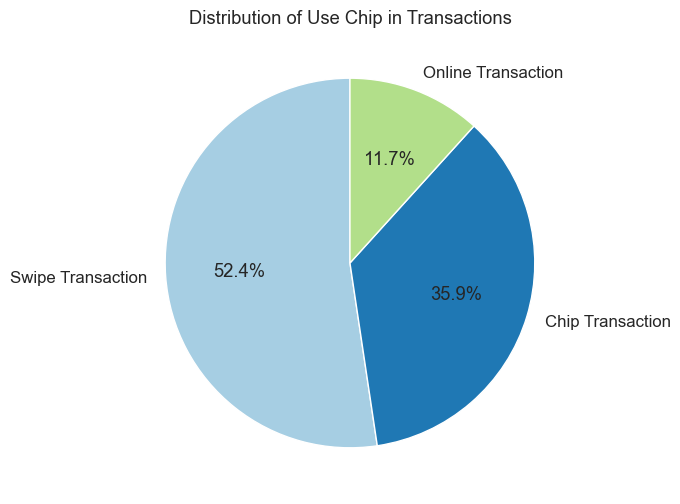

In [70]:
use_chip_counts = df["use_chip"].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    use_chip_counts, 
    labels=use_chip_counts.index, 
    autopct='%1.1f%%', 
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title("Distribution of Use Chip in Transactions")
plt.show()

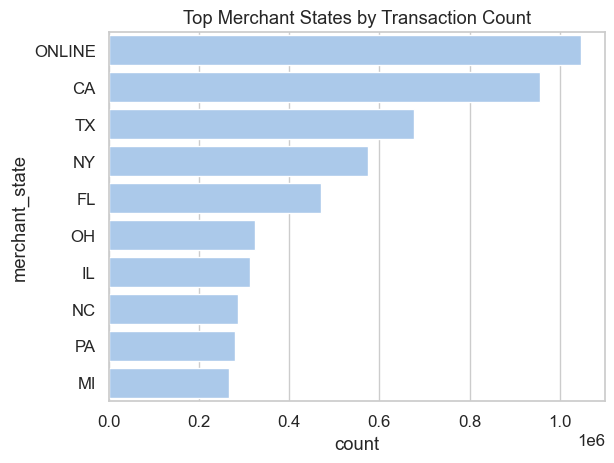

In [68]:
sns.countplot(y=df["merchant_state"], order=df["merchant_state"].value_counts().index[:10])
plt.title("Top Merchant States by Transaction Count")
plt.show()


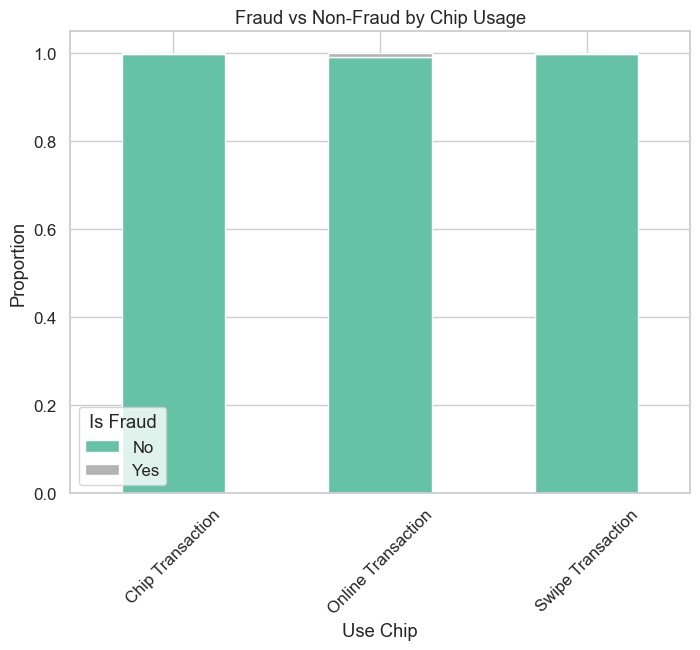

In [71]:
chip_fraud_ct = pd.crosstab(df["use_chip"], df["is_fraud"])

# Normalize to percentages (row-wise)
chip_fraud_pct = chip_fraud_ct.div(chip_fraud_ct.sum(axis=1), axis=0)

# Plot stacked bar chart
chip_fraud_pct.plot(
    kind="bar", 
    stacked=True, 
    figsize=(8,6), 
    colormap="Set2"
)

plt.title("Fraud vs Non-Fraud by Chip Usage")
plt.xlabel("Use Chip")
plt.ylabel("Proportion")
plt.legend(title="Is Fraud")
plt.xticks(rotation=45)
plt.show()

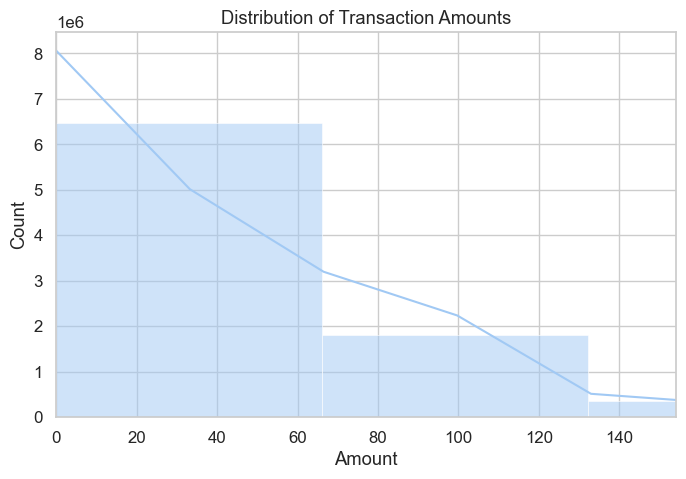

In [64]:
plt.figure(figsize=(8,5))
sns.histplot(df["amount"], bins=100, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.xlim(0, df["amount"].quantile(0.95))  # zoom in (exclude extreme outliers)
plt.show()


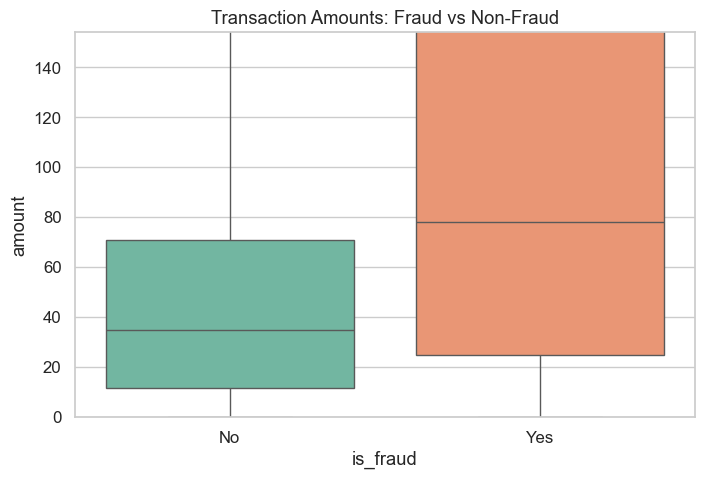

In [65]:
plt.figure(figsize=(8,5))
sns.boxplot(x="is_fraud", y="amount", data=df, palette="Set2")
plt.ylim(0, df["amount"].quantile(0.95))  # cut off outliers for clarity
plt.title("Transaction Amounts: Fraud vs Non-Fraud")
plt.show()


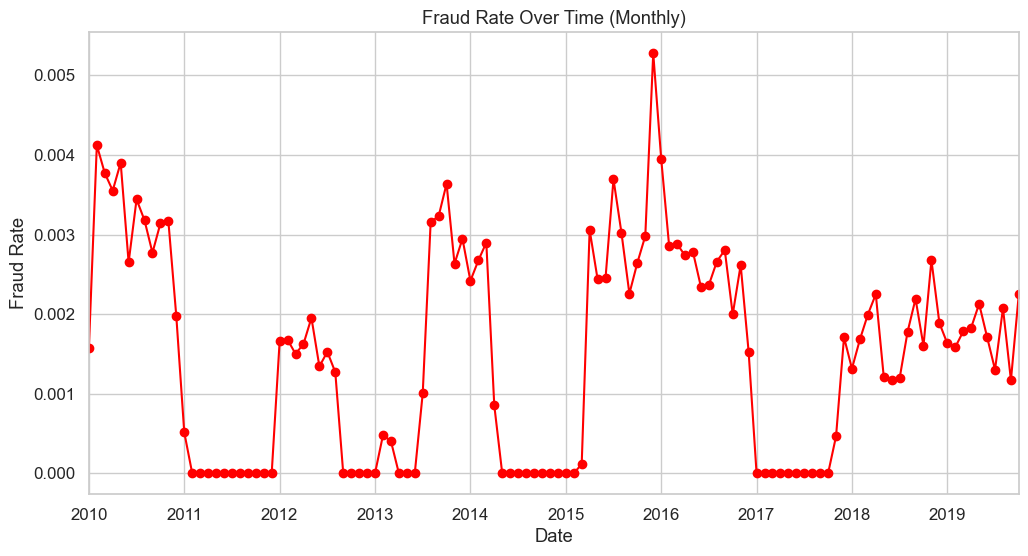

In [67]:
# Ensure datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")

fraud_over_time = df.groupby(df["date"].dt.to_period("M"))["is_fraud"].value_counts().unstack().fillna(0)
fraud_over_time["fraud_rate"] = fraud_over_time["Yes"] / (fraud_over_time["Yes"] + fraud_over_time["No"])

plt.figure(figsize=(12,6))
fraud_over_time["fraud_rate"].plot(marker="o", color="red")
plt.title("Fraud Rate Over Time (Monthly)")
plt.ylabel("Fraud Rate")
plt.xlabel("Date")
plt.show()


In [76]:
mcc_fraud = df.groupby(['is_fraud','mcc_description'])['mcc'].count().reset_index(name='count').sort_values(ascending=False,by='count')
mcc_fraud

,is_fraud,mcc_description,count
45,No,"Grocery Stores, Supermarkets",1066408
64,No,Miscellaneous Food Stores,979265
87,No,Service Stations,954955
34,No,Eating Places and Restaurants,669687
33,No,Drug Stores and Pharmacies,516921
...,...,...,...
125,Yes,Cleaning and Maintenance Services,4
124,Yes,Chiropractors,2
162,Yes,Medical Services,2
185,Yes,"Recreational Sports, Clubs",1


In [77]:
z= mcc_fraud[mcc_fraud['is_fraud']=='Yes'].head(5)
z

,is_fraud,mcc_description,count
132,Yes,Department Stores,2251
203,Yes,Wholesale Clubs,991
135,Yes,Discount Stores,859
170,Yes,Money Transfer,725
138,Yes,Drug Stores and Pharmacies,479


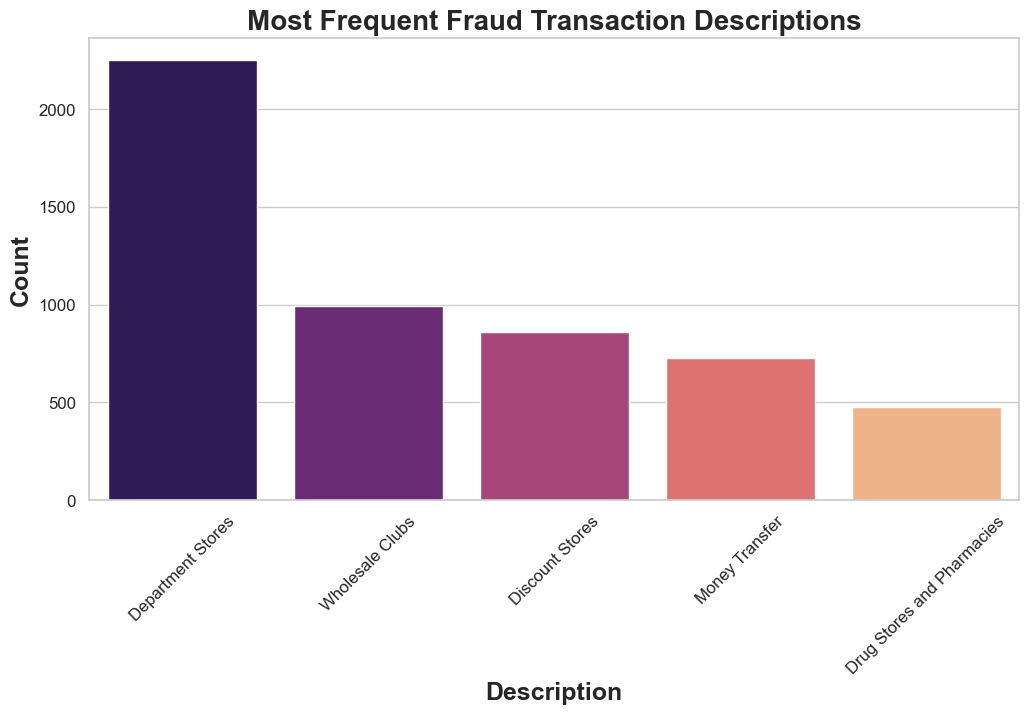

In [79]:
plt.figure(figsize=(12,6))
sns.barplot(x='mcc_description',y='count',data=z,palette='magma')
plt.xticks(rotation=45)
plt.title('Most Frequent Fraud Transaction Descriptions',fontsize=20, fontweight='bold')
plt.xlabel('Description',fontsize=18,fontweight='bold')
plt.ylabel('Count',fontsize=18,fontweight='bold')
plt.show()

In [80]:
df.to_csv('Transaction_cleaned.csv',index=False)